<a href="https://colab.research.google.com/github/PaulRobertH/wine-ml-portfolio/blob/main/Market_cycle_tagging_and_peak_trough_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


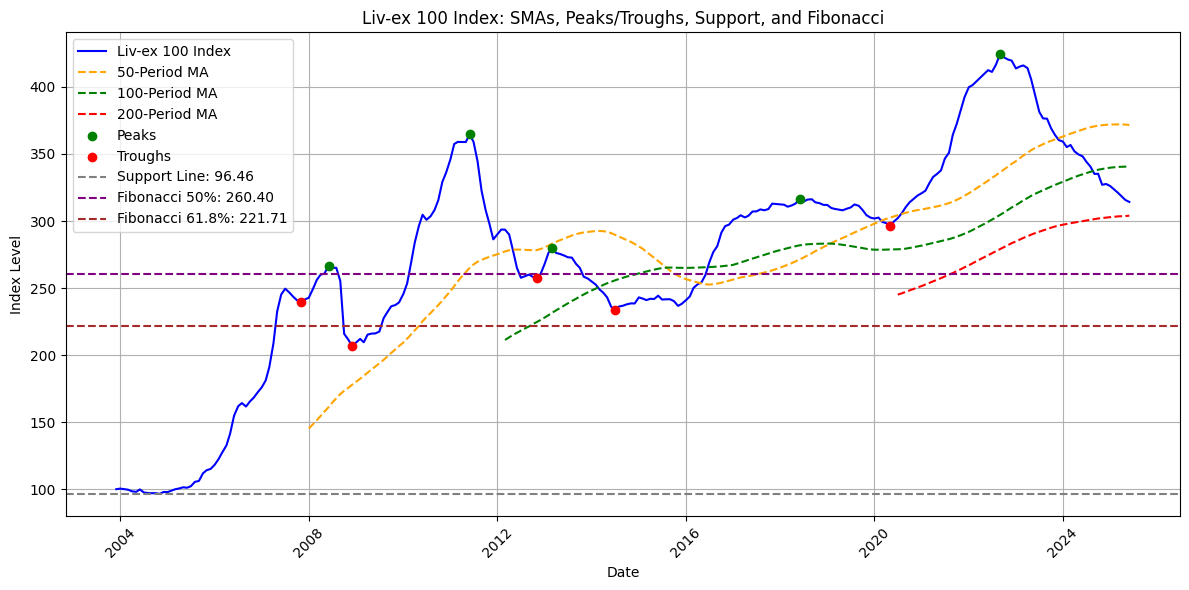

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- Load and clean ---
file_path = '/content/drive/MyDrive/ML-Portfolio/data/Liv-ex 100.csv'
df = pd.read_csv(file_path)

# Rename and clean
df = df.rename(columns={df.columns[0]: 'Date', df.columns[1]: 'Liv-ex 100'})
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Liv-ex 100'] = pd.to_numeric(df['Liv-ex 100'], errors='coerce')
df = df.dropna()
df.set_index('Date', inplace=True)

# --- Moving Averages ---
df['SMA_50'] = df['Liv-ex 100'].rolling(window=50).mean()
df['SMA_100'] = df['Liv-ex 100'].rolling(window=100).mean()
df['SMA_200'] = df['Liv-ex 100'].rolling(window=200).mean()

# --- Peak and Trough Detection ---
peaks, _ = find_peaks(df['Liv-ex 100'], distance=12, prominence=10)
troughs, _ = find_peaks(-df['Liv-ex 100'], distance=12, prominence=10)

# Extract points
peak_vals = df['Liv-ex 100'].iloc[peaks]
peak_dates = df.index[peaks]
trough_vals = df['Liv-ex 100'].iloc[troughs]
trough_dates = df.index[troughs]

# --- Fibonacci and Support ---
support_line = df['Liv-ex 100'].min()
start_value = support_line
peak_value = df['Liv-ex 100'].max()
fib_0_50 = peak_value - (peak_value - start_value) * 0.50
fib_0_618 = peak_value - (peak_value - start_value) * 0.618

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Liv-ex 100'], label="Liv-ex 100 Index", color='blue')
plt.plot(df.index, df['SMA_50'], label="50-Period MA", linestyle='--', color='orange')
plt.plot(df.index, df['SMA_100'], label="100-Period MA", linestyle='--', color='green')
plt.plot(df.index, df['SMA_200'], label="200-Period MA", linestyle='--', color='red')

plt.scatter(peak_dates, peak_vals, color='green', label="Peaks", zorder=5)
plt.scatter(trough_dates, trough_vals, color='red', label="Troughs", zorder=5)

plt.axhline(y=support_line, color='gray', linestyle='--', label=f'Support Line: {support_line:.2f}')
plt.axhline(y=fib_0_50, color='purple', linestyle='--', label=f'Fibonacci 50%: {fib_0_50:.2f}')
plt.axhline(y=fib_0_618, color='brown', linestyle='--', label=f'Fibonacci 61.8%: {fib_0_618:.2f}')

plt.title("Liv-ex 100 Index: SMAs, Peaks/Troughs, Support, and Fibonacci")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend(loc="best")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


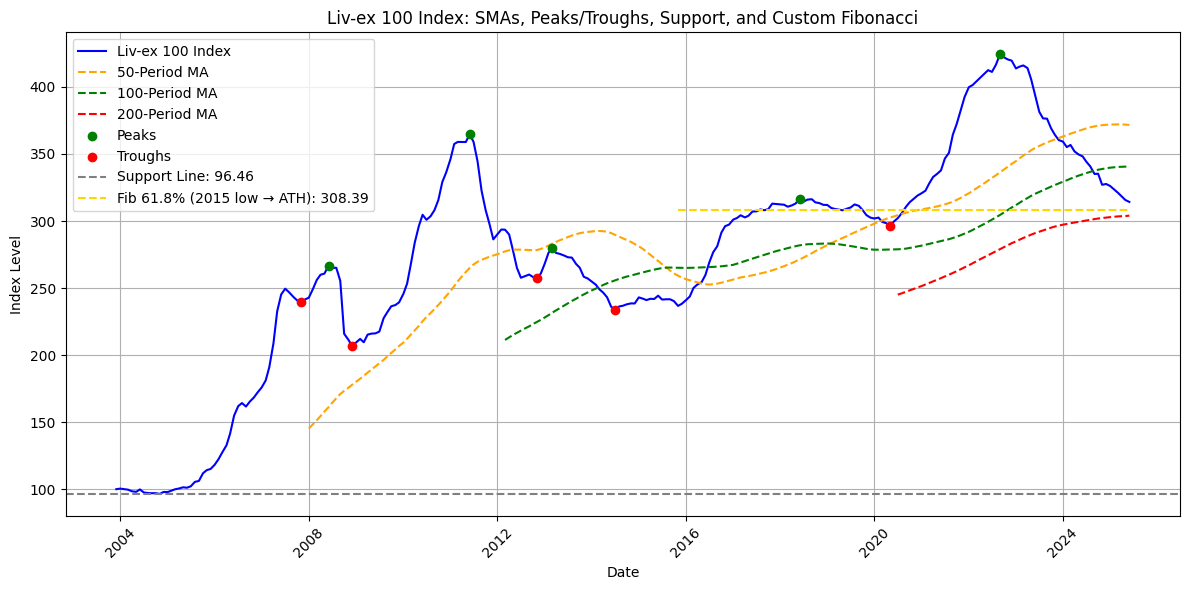

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- Load and clean ---
file_path = '/content/drive/MyDrive/ML-Portfolio/data/Liv-ex 100.csv'
df = pd.read_csv(file_path)

# Rename and clean
df = df.rename(columns={df.columns[0]: 'Date', df.columns[1]: 'Liv-ex 100'})
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Liv-ex 100'] = pd.to_numeric(df['Liv-ex 100'], errors='coerce')
df = df.dropna()
df.set_index('Date', inplace=True)

# --- Moving Averages ---
df['SMA_50'] = df['Liv-ex 100'].rolling(window=50).mean()
df['SMA_100'] = df['Liv-ex 100'].rolling(window=100).mean()
df['SMA_200'] = df['Liv-ex 100'].rolling(window=200).mean()

# --- Peak and Trough Detection ---
peaks, _ = find_peaks(df['Liv-ex 100'], distance=12, prominence=10)
troughs, _ = find_peaks(-df['Liv-ex 100'], distance=12, prominence=10)

# Extract points
peak_vals = df['Liv-ex 100'].iloc[peaks]
peak_dates = df.index[peaks]
trough_vals = df['Liv-ex 100'].iloc[troughs]
trough_dates = df.index[troughs]

# --- Support & custom Fibonacci ---
support_line = df['Liv-ex 100'].min()
peak_value = df['Liv-ex 100'].max()

# Mid-2015 trough to ATH fib
mid_low_date = '2015-07-01'
mid_low_val = df.loc[mid_low_date:, 'Liv-ex 100'].min()
fib_custom_618 = peak_value - (peak_value - mid_low_val) * 0.618
fib_custom_start = df.loc[mid_low_date:, 'Liv-ex 100'].idxmin()

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Liv-ex 100'], label="Liv-ex 100 Index", color='blue')
plt.plot(df.index, df['SMA_50'], label="50-Period MA", linestyle='--', color='orange')
plt.plot(df.index, df['SMA_100'], label="100-Period MA", linestyle='--', color='green')
plt.plot(df.index, df['SMA_200'], label="200-Period MA", linestyle='--', color='red')

plt.scatter(peak_dates, peak_vals, color='green', label="Peaks", zorder=5)
plt.scatter(trough_dates, trough_vals, color='red', label="Troughs", zorder=5)

plt.axhline(y=support_line, color='gray', linestyle='--', label=f'Support Line: {support_line:.2f}')

# Custom 61.8% fib from 2015 trough to ATH
plt.hlines(y=fib_custom_618,
           xmin=fib_custom_start,
           xmax=df.index[-1],
           color='gold',
           linestyle='--',
           label=f'Fib 61.8% (2015 low → ATH): {fib_custom_618:.2f}')

plt.title("Liv-ex 100 Index: SMAs, Peaks/Troughs, Support, and Custom Fibonacci")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend(loc="best")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


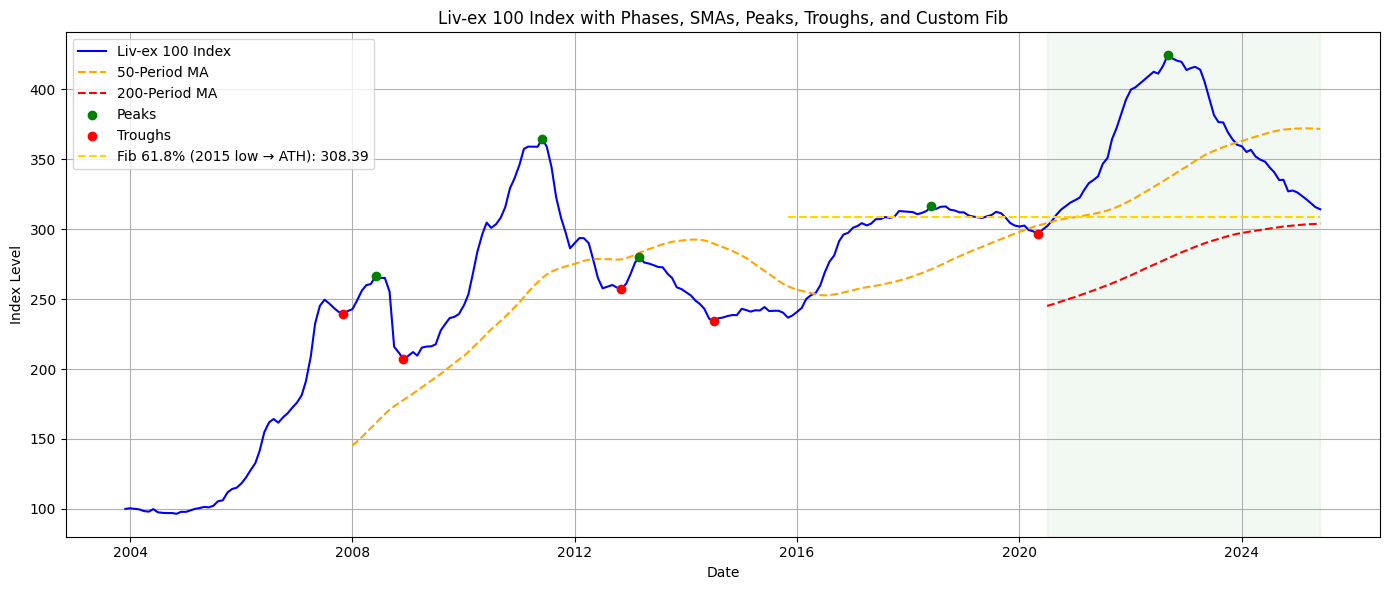

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- Load and clean ---
file_path = '/content/drive/MyDrive/ML-Portfolio/data/Liv-ex 100.csv'  # Adjust as needed
df = pd.read_csv(file_path)

# Rename and clean
df = df.rename(columns={df.columns[0]: 'Date', df.columns[1]: 'Liv-ex 100'})
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Liv-ex 100'] = pd.to_numeric(df['Liv-ex 100'], errors='coerce')
df.dropna(inplace=True)
df.set_index('Date', inplace=True)

# --- Moving Averages ---
df['SMA_50'] = df['Liv-ex 100'].rolling(window=50).mean()
df['SMA_200'] = df['Liv-ex 100'].rolling(window=200).mean()

# --- Peaks and Troughs ---
peaks, _ = find_peaks(df['Liv-ex 100'], distance=12, prominence=10)
troughs, _ = find_peaks(-df['Liv-ex 100'], distance=12, prominence=10)
df['Peak'] = False
df['Trough'] = False
df.iloc[peaks, df.columns.get_loc('Peak')] = True
df.iloc[troughs, df.columns.get_loc('Trough')] = True

# --- Regime Detection (Bull/Bear) ---
df['Phase'] = None
df.loc[df['Liv-ex 100'] > df['SMA_200'], 'Phase'] = 'Bull'
df.loc[df['Liv-ex 100'] < df['SMA_200'], 'Phase'] = 'Bear'
df['Phase'] = df['Phase'].ffill()

# --- Custom Fibonacci (mid-2015 low to ATH) ---
ath = df['Liv-ex 100'].max()
mid_low_idx = df['Liv-ex 100'].loc['2015-07-01':].idxmin()
mid_low_val = df.loc[mid_low_idx, 'Liv-ex 100']
fib_custom_618 = ath - (ath - mid_low_val) * 0.618

# --- Plot ---
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Liv-ex 100'], label="Liv-ex 100 Index", color='blue')
plt.plot(df.index, df['SMA_50'], label="50-Period MA", linestyle='--', color='orange')
plt.plot(df.index, df['SMA_200'], label="200-Period MA", linestyle='--', color='red')

# Peaks and troughs
plt.scatter(df.index[df['Peak']], df['Liv-ex 100'][df['Peak']], color='green', label='Peaks', zorder=5)
plt.scatter(df.index[df['Trough']], df['Liv-ex 100'][df['Trough']], color='red', label='Troughs', zorder=5)

# Custom Fib line
plt.hlines(y=fib_custom_618, xmin=mid_low_idx, xmax=df.index[-1],
           color='gold', linestyle='--',
           label=f'Fib 61.8% (2015 low → ATH): {fib_custom_618:.2f}')

# Color shaded Bull/Bear phases
for phase, color in zip(['Bull', 'Bear'], ['green', 'purple']):
    mask = df['Phase'] == phase
    if not df.index[mask].empty:
        plt.axvspan(df.index[mask][0], df.index[mask][-1], color=color, alpha=0.05)

# Finalize plot
plt.title("Liv-ex 100 Index with Phases, SMAs, Peaks, Troughs, and Custom Fib")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()
